Programming for Economics - PS3 - Group/18 

In [19]:
# Import libraries / Functions 
import numpy as np
import pandas as pd
import seaborn as sb
import statsmodels.api as sm
import scipy
import matplotlib.pyplot as plt
import  quantecon as qe 
from quantecon import rouwenhorst 

def gini(array):
    array = np.array(array)
    array = array.flatten() 
    if np.amin(array) < 0:
        array += np.amin(array)
    array += 0.0000001 
    array = np.sort(array) 
    index = np.arange(1,array.shape[0]+1) 
    n = array.shape[0]
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) 

In [20]:
# ======================================
#             Question 1 
# ======================================

/Users/richardkundratitz/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


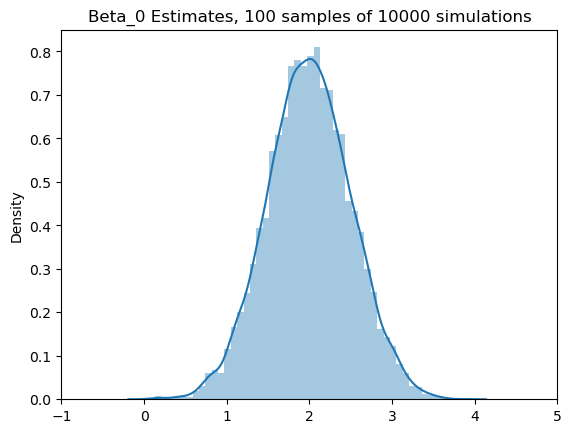

/Users/richardkundratitz/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


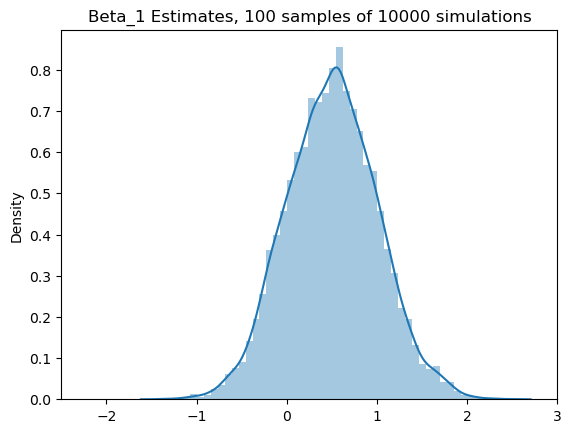

In [21]:
#Q1.a
T = 10000
beta_0 = []
beta_1 = []

for t in range(T):
    N=100
    sigma_e = 5
    
    x2 = np.random.normal(0, 1, N) #Estimate X2 which follows a normal distribution with mean 0 and variance 1 
    e = np.random.normal(0, sigma_e, N) #Estimate random error terms which follow a normal distirbution 

    y1 = 2 + 0.5*x2 + e #estimate y1
    X = sm.add_constant(x2) # We need to add constant, B0

    ols1 = sm.OLS(y1,X).fit() # fit OLS model 
    
    beta_0.append(ols1.params[0]) # store parameters for beta_0
    beta_1.append(ols1.params[1]) #store parameters for beta_1
 
sb.distplot(x=beta_0, bins=50)
plt.title("Beta_0 Estimates, 100 samples of 10000 simulations")
plt.xlim((-1,5))
plt.show()

sb.distplot(x=beta_1, bins=50)
plt.title("Beta_1 Estimates, 100 samples of 10000 simulations")
plt.xlim((-2.5,3))
plt.show()

/Users/richardkundratitz/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


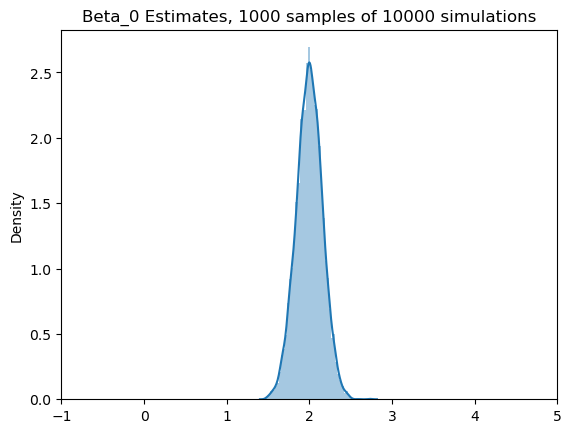

/Users/richardkundratitz/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


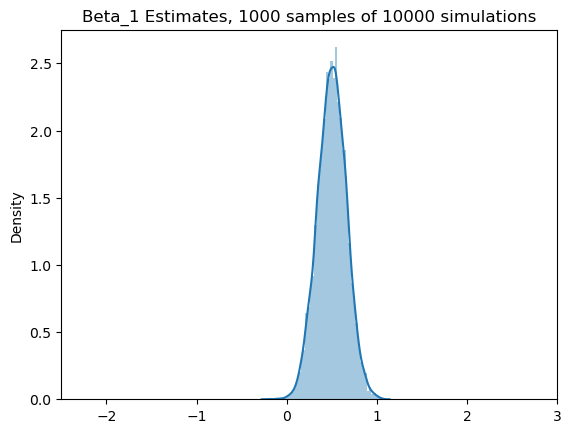

In [22]:
#Q.1b
T=10000

beta_0 = []
beta_1 = []

for t in range(T):
    N=1000
    sigma_e = 5
    
    x2 = np.random.normal(0, 1, N) #Estimate X2 which follows a normal distribution with mean 0 and variance 1 
    e = np.random.normal(0, sigma_e, N) #Estimate random error terms which follow a normal distirbution 

    y1 = 2 + 0.5*x2 + e #estimate y1
    X = sm.add_constant(x2) # We need to add constant, B0

    ols1 = sm.OLS(y1,X).fit() # fit OLS model 
    
    beta_0.append(ols1.params[0]) # store parameters for beta_0
    beta_1.append(ols1.params[1]) #store parameters for beta_1
 
sb.distplot(x=beta_0, bins=50)
plt.title("Beta_0 Estimates, 1000 samples of 10000 simulations")
plt.xlim((-1,5))
plt.show()

sb.distplot(x=beta_1, bins=50)
plt.title("Beta_1 Estimates, 1000 samples of 10000 simulations")
plt.xlim((-2.5,3))
plt.show()

# When N increases, the asymptotic distributions are still centered around the same means (2 and 0.5, respectively).
# However, we observe that it is a much tighter distribution i.e the standard deviation is smaller.
# This feature is one result of the central limit theorem: as sample size increases, the spread of a sampling distribution decreases. 
#
# Intuitively, a higher sample size means that OLS coefficients further from the mean have a smaller weight as a proportion of all OLS coefficients.
# So with high N, occasional outliers would not have as large an impact on the overall distribution as when N is low.

In [23]:
# ======================================
#             Question 2
# ======================================

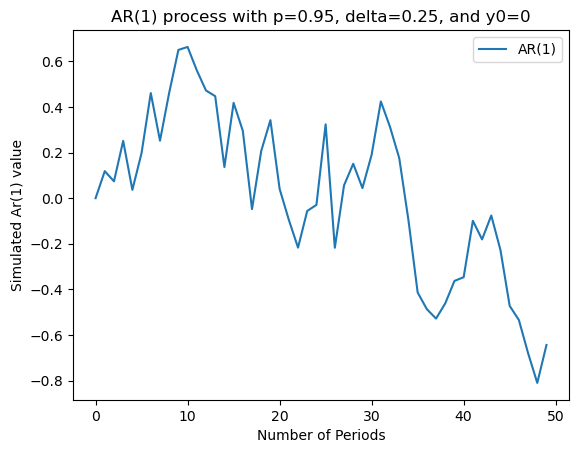

In [24]:
#Q2.a
#    set up the parameters
T = 50
rho = 0.95
sigma_e = 0.25
y0 = 0


y = np.zeros(T)    #create list with T zeros
y[0] = y0          #start the list with 0

for t in range(1, T):               
    e = np.random.normal(0, sigma_e)
    y[t] = rho * y[t-1] + e

plt.plot(y, label='AR(1)')
plt.xlabel('Number of Periods')
plt.ylabel('Simulated Ar(1) value')
plt.title('AR(1) process with p=0.95, delta=0.25, and y0=0')
plt.legend()
plt.show()


In [25]:
#Q2.b
N = 100
T = 50
rho = 0.95
sigma_e = 0.25

def ar_1_sim(N, T, rho, sigma_e):
    y = np.zeros((N, T))
    e = np.random.normal(0, sigma_e, (N, T))
    for t in range(1, T):
        y[:, t] = rho * y[:, t-1] + e[:, t]
    return y


y_NT = ar_1_sim(N,T,rho,sigma_e) # test if function works provides expected output 
print(y_NT)
# report each AR(1) model in an individual row
# each row represents one household, whereby each household starts with 0 
# moving from column 1 to column 2 the households follows and AR(1) process  


[[ 0.         -0.03905573 -0.02595308 ...  0.10907322 -0.37809556
  -0.00767915]
 [ 0.          0.20040706  0.44603251 ... -0.20926095 -0.02325072
   0.15980873]
 [ 0.          0.02775048  0.09973783 ...  0.43605611  0.38416126
  -0.24982494]
 ...
 [ 0.         -0.00399339 -0.0034825  ... -0.18750407 -0.71923994
  -0.53784366]
 [ 0.          0.13361127 -0.00852601 ...  0.56865686  0.44274138
   0.49688093]
 [ 0.         -0.13037665  0.40031208 ...  0.62966585  0.84335623
   0.84970177]]


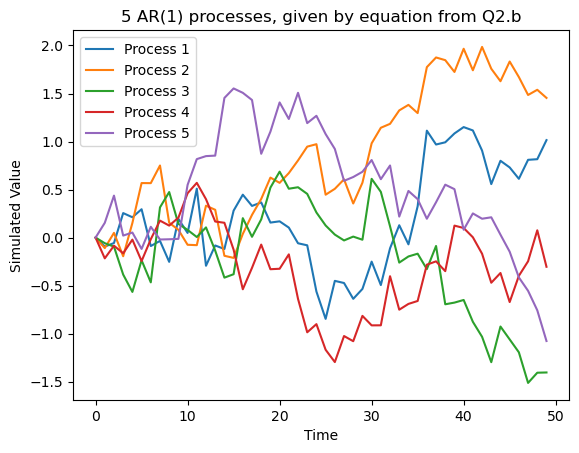

In [26]:
#Q2.c
N = 5
T = 50
y_q2c = ar_1_sim(N,T , rho, sigma_e)

for i in range(N):
    plt.plot(y_q2c[i, :],label="Process {}".format(i+1))

plt.xlabel("Time")
plt.ylabel("Simulated Value")
plt.title("5 AR(1) processes, given by equation from Q2.b")
plt.legend(loc="best")
plt.show()


/Users/richardkundratitz/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


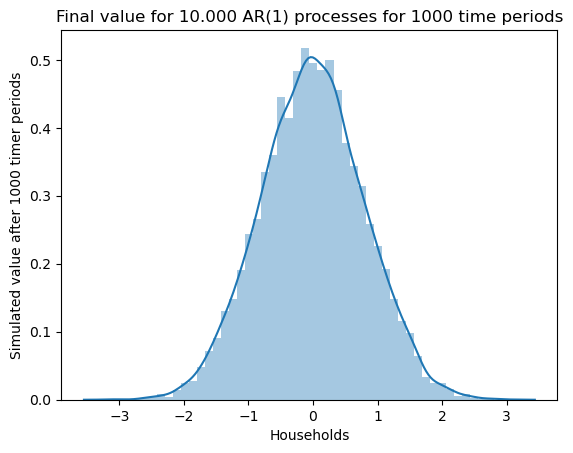

The variance of the last period is  0.6355760965354968
The gini of the last period is  0.42771112260242067


In [27]:
#Q2.d  
T = 1000
N = 10000
y_q2d = ar_1_sim(N,T , rho, sigma_e)

#Plot the last period for 10 000 individuals 
last_period = y_q2d[:,-1]

sb.distplot(x=last_period)
plt.xlabel("Households")
plt.ylabel("Simulated value after 1000 timer periods")
plt.title("Final value for 10.000 AR(1) processes for 1000 time periods")
plt.show()

last_period_var = last_period.var() #Variance of y in the last period 
last_period_e = np.exp(last_period) # take exponential since y is in logs and to find the Gini, we need to "de-log" the observations
last_period_gini = gini(last_period_e) 

print("The variance of the last period is ", last_period_var)
print("The gini of the last period is ", last_period_gini)

In [28]:
#Q2.e
mc_ar1 = rouwenhorst(n=3, ybar=0, sigma=0.25, rho=0.95)
P1 = mc_ar1.P
psi1_stationary_dist = mc_ar1.stationary_distributions
mean_mc_y1 = np.mean(P1) 

#What is the resulting transition matrix P? 
print('The transition matrix P is \n' , P1)

#What is the resulting stationary distribution ψ∗?
print('Stationary distribution of the Markov Chain is ', psi1_stationary_dist)

#The expected value (mu*) of y1 is:
print('Mean MC approx of AR(1) y1 is', mean_mc_y1)


The transition matrix P is 
 [[9.50625e-01 4.87500e-02 6.25000e-04]
 [2.43750e-02 9.51250e-01 2.43750e-02]
 [6.25000e-04 4.87500e-02 9.50625e-01]]
Stationary distribution of the Markov Chain is  [[0.25 0.5  0.25]]
Mean MC approx of AR(1) y1 is 0.3333333333333333


In [29]:
# ======================================
#             Question 3
# ======================================

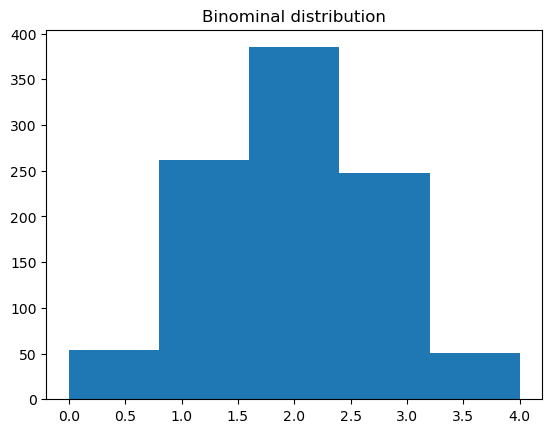

In [30]:
#Q3.a
N = 1000 # We set N=1000, no size of the simulation was specified in problem set
n = 4
p = 0.5

binominal = scipy.stats.binom.rvs(n, p, size=N)
plt.hist(binominal, bins=5 )
plt.title("Binominal distribution")
plt.show()
# Graph shows distribution of binominal distribution 


In [31]:
#3.b
def g(x):
    g=x**2
    return g 
    
N = 10000
y_q3b = np.empty(N)
for i in range (N):
    x = np.random.poisson(lam=2)
    y_q3b[i] = g(x)

y_q3b.mean()
print('Expected value of a function g(x) = x^2:', y_q3b.mean())

# mean ≠ lambda 
# the poisson distribution is a skewed distribution. g(x) is non-linear, hence E(g(x)) ≠ g(E(x))
# An economic example would be Von Neumann-Morgnestern utility functions, which are convex utility function, alpha*U(x1)+(1-alpha)U(x2) ≠ E(U(x))
# as the sample size, N, increases, g(E(x)) approaches E(g(x)) , but they will never equal each other 

Expected value of a function g(x) = x^2: 6.0208


In [32]:
# ======================================
#             Question 4
# ======================================

In [33]:
#Q4.a
mu = 7.5
sigma = 0.8 
N = 100000

y = np.random.lognormal(mu, sigma,N)

y_mean = y.mean()
y_var = y.var()
y_gini = gini(y)

print("Average of an individual's income is:", y_mean)
print("Variance of an individual's income is:", y_var)
print("Gini of an individual's income is:", y_gini)



Average of an individual's income is: 2472.068993333071
Variance of an individual's income is: 5510913.243039364
Gini of an individual's income is: 0.42840924943397163


In [34]:
#Q4.b
c_i = np.empty(N)

for i in range(N):
    c_i[i]=y[i]**0.8 +0.5*y[i]+500
    
c_mean = c_i.mean()
c_var = c_i.var()
c_gini = gini(c_i)

print("Average of an individual's consumption is:", c_mean)
print("Variance of an individual's consumption is:", c_var)
print("Gini of an individual's consumption is:", c_gini)


Average of an individual's consumption is: 2228.273342812393
Variance of an individual's consumption is: 2318495.892715119
Gini of an individual's consumption is: 0.31474537563370225


/Users/richardkundratitz/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/richardkundratitz/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


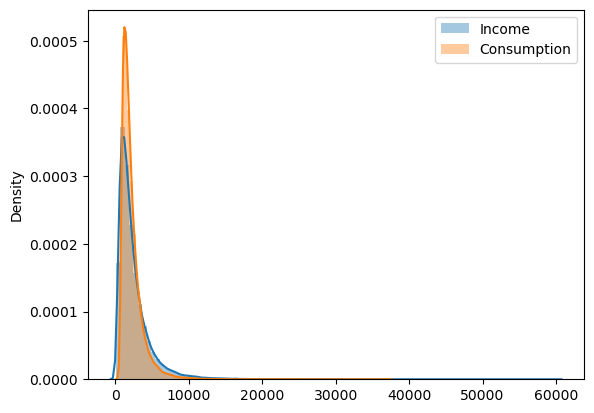

In [35]:
#Q4.c
# Plot the histograms of y and c
fig, ax = plt.subplots()
sb.distplot(x=y, bins=100, ax=ax, label='Income')
sb.distplot(x=c_i, bins=100, ax=ax, label='Consumption')
ax.legend()
plt.show()
